<a href="https://colab.research.google.com/github/Ravinder7827/Voice-Based-Cognitive-Decline-Detection/blob/main/Memo_tag_ai_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install all necessary libraries
!pip install -U openai-whisper
!pip install pydub librosa scikit-learn pandas matplotlib seaborn
!sudo apt update && sudo apt install ffmpeg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s e

In [2]:
# Upload .wav files from your system
from google.colab import files
uploaded = files.upload()


Saving Speaker27_007.wav to Speaker27_007.wav
Saving Speaker27_006.wav to Speaker27_006.wav
Saving Speaker27_005.wav to Speaker27_005.wav
Saving Speaker27_004.wav to Speaker27_004.wav
Saving Speaker27_003.wav to Speaker27_003.wav
Saving Speaker27_002.wav to Speaker27_002.wav
Saving Speaker27_001.wav to Speaker27_001.wav


In [29]:
# Load Whisper model
import whisper
whisper_model = whisper.load_model("base")  # You can also use "small", "medium" etc.


In [30]:
# Transcription function
def transcribe_audio(file_path):
    result = whisper_model.transcribe(file_path)
    return result["text"]


In [6]:
# Example for one file (change filename as needed)
transcript = transcribe_audio("/content/Speaker27_001.wav")
print("Transcript:\n", transcript)


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript:
  struggle. Comparatively few people appreciate how the thought of navigating the air's disious tights and the seas glumious depths has obsessed the minds of inventors. From the earliest days of history men have grappled with the problem, yet it is only within two hundred years for aircraft and one hundred for submarines that any really intelligent start has been made upon its solution. The men who really gave practical effect to the vague theories which others set up, in aircraft the rights, Santos, Dumont, and Count Zeppelin, and submarines, Lake and Holland, are either still living or have died so recently that their memory is still fresh in the minds of all. In this book the author has sketched swiftly the slow stages by which in each of these fields of activity success has been attained. He has collated from the immense mass of records of the activities of both submarines and aircraft enough interesting data to show the degree of proof.


In [7]:
from pydub import AudioSegment, silence
import librosa
import numpy as np
import re


In [8]:
def extract_features(file_path, transcript):
    features = {}

    # Load audio
    audio = AudioSegment.from_wav(file_path)
    duration_sec = len(audio) / 1000.0

    # 1. Pause Count
    pauses = silence.detect_silence(audio, min_silence_len=300, silence_thresh=-40)
    features["pause_count"] = len(pauses)

    # 2. Hesitation Words
    hesitations = len(re.findall(r"\b(uh+|um+|erm+|hmm+)\b", transcript.lower()))
    features["hesitation_count"] = hesitations

    # 3. Speech Rate (words/sec)
    words = transcript.split()
    features["speech_rate"] = len(words) / duration_sec

    # 4. Pitch Variability
    y, sr = librosa.load(file_path)
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    features["pitch_var"] = np.std(pitch_values) if len(pitch_values) > 0 else 0

    # 5. Incomplete Sentences (Optional)
    incomplete = len(re.findall(r"(\.\.\.|-|- -|- - -)", transcript))
    features["incomplete_sentences"] = incomplete

    return features


In [10]:
import os
import pandas as pd

In [11]:
# Get all .wav files
audio_files = [f for f in os.listdir('/content') if f.endswith('.wav')]

In [12]:
# Run transcription + feature extraction
data = []
for file in audio_files:
    path = f"/content/{file}"
    text = transcribe_audio(path)
    features = extract_features(path, text)
    features["file"] = file
    data.append(features)


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/

In [13]:
# Create DataFrame
df = pd.DataFrame(data)
df

,pause_count,hesitation_count,speech_rate,pitch_var,incomplete_sentences,file
0,23,0,2.983333,1115.658813,0,Speaker27_006.wav
1,23,0,2.216667,1146.989990,0,Speaker27_004.wav
2,20,0,2.683333,1154.262329,0,Speaker27_002.wav
3,21,0,2.733333,1100.173950,0,Speaker27_007.wav
4,22,0,2.700000,1152.282837,0,Speaker27_001.wav
5,23,0,2.850000,1168.379150,3,Speaker27_003.wav
6,21,0,2.483333,1087.100220,3,Speaker27_005.wav


In [31]:
# Load ML model (after DataFrame is ready)
from sklearn.ensemble import IsolationForest
X = df.drop(columns=["file"])
ml_model = IsolationForest()
ml_model.fit(X)

IsolationForest()

In [15]:
from sklearn.ensemble import IsolationForest

X = df.drop(columns=["file"])
model = IsolationForest()
model.fit(X)  # Fit the model to your data before using it
df["risk_score"] = -model.decision_function(X)  # Higher score = higher risk
df = df.sort_values("risk_score", ascending=False)
df

,pause_count,hesitation_count,speech_rate,pitch_var,incomplete_sentences,file,risk_score
6,21,0,2.483333,1087.100220,3,Speaker27_005.wav,0.061338
5,23,0,2.850000,1168.379150,3,Speaker27_003.wav,0.033359
2,20,0,2.683333,1154.262329,0,Speaker27_002.wav,0.000370
1,23,0,2.216667,1146.989990,0,Speaker27_004.wav,-0.000683
0,23,0,2.983333,1115.658813,0,Speaker27_006.wav,-0.019645
3,21,0,2.733333,1100.173950,0,Speaker27_007.wav,-0.045637
4,22,0,2.700000,1152.282837,0,Speaker27_001.wav,-0.093298


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


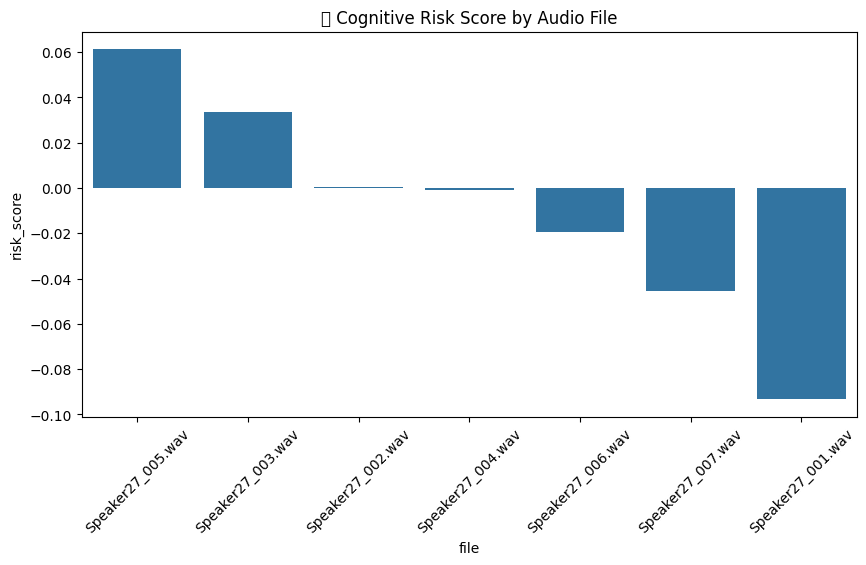

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Risk score barplot
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="file", y="risk_score")
plt.xticks(rotation=45)
plt.title("🧠 Cognitive Risk Score by Audio File")
plt.show()


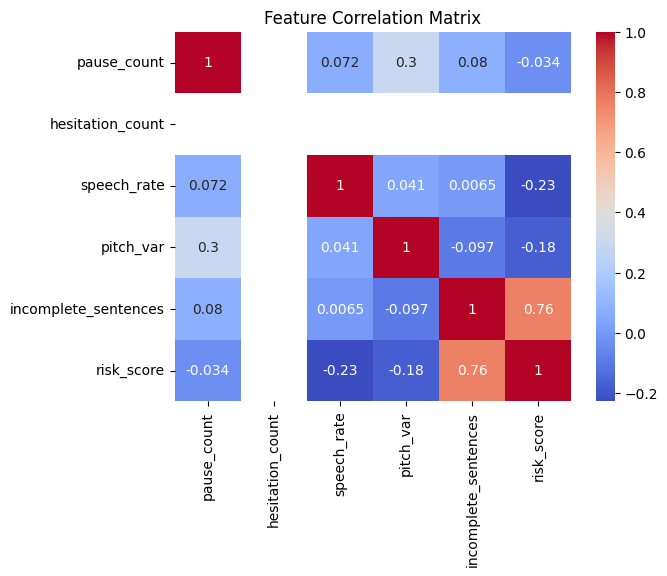

In [17]:
# Correlation heatmap
sns.heatmap(df.drop(columns=["file"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [40]:
def predict_cognitive_risk(file_path):
    transcript = transcribe_audio(file_path)
    features = extract_features(file_path, transcript)
    test_df = pd.DataFrame([features])

    # Ensure test_df has the same columns as X, in the same order
    test_df = test_df[X.columns.drop('risk_score')]

    risk_score = -model.decision_function(test_df)[0]
    return risk_score, transcript


In [21]:
from sklearn.ensemble import IsolationForest

In [23]:
X = df.drop(columns=["file"])
model = IsolationForest()
model.fit(X)

IsolationForest()

In [24]:
import pandas as pd
import numpy as np


In [37]:
def predict_cognitive_risk(file_path):
    transcript = transcribe_audio(file_path)
    features = extract_features(file_path, transcript)
    test_df = pd.DataFrame([features])

    # Ensure test_df has the same columns as the training data (excluding 'file' and 'risk_score' if present)
    test_df = test_df[[col for col in X.columns if col not in ['file', 'risk_score']]]

    risk_score = -model.decision_function(test_df)[0]
    return risk_score, transcript


In [26]:
import os
print(os.listdir("/content"))


['.config', 'Speaker27_006.wav', 'Speaker27_004.wav', 'Speaker27_002.wav', 'Speaker27_007.wav', 'Speaker27_001.wav', 'Speaker27_003.wav', 'Speaker27_005.wav', 'sample_data']


In [42]:
df.to_csv("final_audio_analysis.csv", index=False)


-----------------------------------------extra feature add -----------------

Extra feature add **bold text**

In [55]:
!pip install -U openai-whisper


In [56]:
!pip install pydub librosa scikit-learn pandas matplotlib seaborn
!sudo apt update && sudo apt install ffmpeg

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,694 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,836 kB]
Fetched 11.7 MB in 4s (2,998 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading stat

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Speaker27_007.wav to Speaker27_007 (1).wav
Saving Speaker27_006.wav to Speaker27_006 (1).wav
Saving Speaker27_005.wav to Speaker27_005 (1).wav
Saving Speaker27_004.wav to Speaker27_004 (1).wav
Saving Speaker27_003.wav to Speaker27_003 (1).wav
Saving Speaker27_002.wav to Speaker27_002 (1).wav
Saving Speaker27_001.wav to Speaker27_001 (1).wav
Saving Speaker27_000.wav to Speaker27_000.wav
Saving Speaker26_029.wav to Speaker26_029.wav


In [58]:
import os
audio_files = [f for f in os.listdir('/content') if f.endswith('.wav')]
print('Found files:', audio_files)

Found files: ['Speaker27_006.wav', 'Speaker27_006 (1).wav', 'Speaker27_004.wav', 'Speaker27_002 (1).wav', 'Speaker27_001 (1).wav', 'Speaker27_005 (1).wav', 'Speaker27_003 (1).wav', 'Speaker27_004 (1).wav', 'Speaker26_029.wav', 'Speaker27_000.wav', 'Speaker27_002.wav', 'Speaker27_007.wav', 'Speaker27_001.wav', 'Speaker27_007 (1).wav', 'Speaker27_003.wav', 'Speaker27_005.wav']


In [59]:
import whisper
whisper_model = whisper.load_model('base')

In [60]:
def transcribe_audio(file_path):
    result = whisper_model.transcribe(file_path)
    return result['text']

In [61]:
transcripts = {}
for file in audio_files:
    path = os.path.join('/content', file)
    text = transcribe_audio(path)
    transcripts[file] = text
    print(f'✅ {file}:\n{text[:200]}...\n')

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_006.wav:
 Looking back upon the day with knowledge of what General French's army faced, a knowledge largely denied to him, it seems that the British escaped from annihilation was miraculous. And indeed it was ...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_006 (1).wav:
 Looking back upon the day with knowledge of what General French's army faced, a knowledge largely denied to him, it seems that the British escaped from annihilation was miraculous. And indeed it was ...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_004.wav:
 of many records of personal experiences of those who have dared the air's high altitudes, and the seas stilly depths. For permission to use certain of these, he wishes to express his things to the ce...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_002 (1).wav:
 perfection, and practical ability to which both have been brought. And he has outlined, so far as possible, from existing conditions, the possibilities of future usefulness in fields other than those...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_001 (1).wav:
 struggle. Comparatively few people appreciate how the thought of navigating the air's disious tights and the seas glumious depths has obsessed the minds of inventors. From the earliest days of histor...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_005 (1).wav:
 CHAPTER I A VARECRAFT AND SUBMARANES by Willis J. Abbott. This liberal-vox recording is in the public domain. Recording by William Tomcoe. Introductory It was Ed Mons in the third week of the Great W...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_003 (1).wav:
 Opportunities for the peaceful use of airplanes are beginning to suggest themselves daily. After the main body of this book was in type, the Postmaster General of the United States called for bids fo...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_004 (1).wav:
 of many records of personal experiences of those who have dared the air's high altitudes, and the seas stilly depths. For permission to use certain of these, he wishes to express his things to the ce...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker26_029.wav:
 and the lion. A fox who had never yet seen a lion when he fell in with him by a certain chance for the first time in the forest was so frightened that he was near dying from fear. On his meeting with...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_000.wav:
 Preface of Aircraft and Submarines The story of the invention, development, and present-day uses of wars' newest weapons This is the Librevox Recording. All Librevox recordings are in the public doma...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_002.wav:
 perfection, and practical ability to which both have been brought. And he has outlined, so far as possible, from existing conditions, the possibilities of future usefulness in fields other than those...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_007.wav:
 They left General French's right flank in the air, exposed to involvement by Van Kluck, who was already reaching around the left flank. The German troops were ample and numbered as around the British...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_001.wav:
 struggle. Comparatively few people appreciate how the thought of navigating the air's disious tights and the seas glumious depths has obsessed the minds of inventors. From the earliest days of histor...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_007 (1).wav:
 They left General French's right flank in the air, exposed to involvement by Van Kluck, who was already reaching around the left flank. The German troops were ample and numbered as around the British...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_003.wav:
 Opportunities for the peaceful use of airplanes are beginning to suggest themselves daily. After the main body of this book was in type, the Postmaster General of the United States called for bids fo...



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


✅ Speaker27_005.wav:
 CHAPTER I A VARECRAFT AND SUBMARANES by Willis J. Abbott. This liberal-vox recording is in the public domain. Recording by William Tomcoe. Introductory It was Ed Mons in the third week of the Great W...



In [62]:
from pydub import AudioSegment, silence
import librosa
import numpy as np
import re

def compute_jitter(pitches):
    return np.mean(np.abs(np.diff(pitches))) if len(pitches) > 1 else 0

def extract_features(file_path, transcript):
    features = {}

    # Load audio
    audio = AudioSegment.from_wav(file_path)
    duration_sec = len(audio) / 1000.0

    # 1. Pause Count
    pauses = silence.detect_silence(audio, min_silence_len=300, silence_thresh=-40)
    features["pause_count"] = len(pauses)

    # 2. Hesitation Words
    hesitations = len(re.findall(r"\b(uh+|um+|erm+|hmm+)\b", transcript.lower()))
    features["hesitation_count"] = hesitations

    # 3. Speech Rate
    words = transcript.split()
    features["speech_rate"] = len(words) / duration_sec

    # 4. Pitch and Jitter
    y, sr = librosa.load(file_path)
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    features["pitch_var"] = np.std(pitch_values) if len(pitch_values) > 0 else 0
    features["jitter"] = compute_jitter(pitch_values)
    features["max_pitch"] = np.max(pitch_values) if len(pitch_values) > 0 else 0
    features["min_pitch"] = np.min(pitch_values) if len(pitch_values) > 0 else 0

    # 5. Articulation Rate
    non_silent_parts = silence.detect_nonsilent(audio, min_silence_len=300, silence_thresh=-40)
    speaking_time = sum([end - start for start, end in non_silent_parts]) / 1000.0
    features["articulation_rate"] = len(words) / speaking_time if speaking_time > 0 else 0

    # 6. Mean Pause Duration
    pause_durations = [(end - start) / 1000.0 for start, end in pauses]
    features["mean_pause_duration"] = np.mean(pause_durations) if pause_durations else 0

    # 7. Filler Rate
    features["filler_rate"] = hesitations / (duration_sec / 60.0)

    # 8. Lexical Richness
    unique_words = set([w.lower() for w in words])
    features["lexical_diversity"] = len(unique_words) / len(words) if len(words) > 0 else 0

    # 9. Incomplete Sentences
    incomplete = len(re.findall(r"(\.\.\.|-|- -|- - -)", transcript))
    features["incomplete_sentences"] = incomplete

    return features


In [63]:
import pandas as pd
data = []
for file in audio_files:
    path = os.path.join('/content', file)
    features = extract_features(path, transcripts[file])
    features['file'] = file
    data.append(features)
df = pd.DataFrame(data)
df

,pause_count,hesitation_count,speech_rate,pitch_var,jitter,max_pitch,min_pitch,articulation_rate,mean_pause_duration,filler_rate,lexical_diversity,incomplete_sentences,file
0,23,0,2.983333,1115.658813,3.273888,3999.717529,145.367798,3.859838,0.592391,0.0,0.625698,0,Speaker27_006.wav
1,23,0,2.983333,1115.658813,3.273888,3999.717529,145.367798,3.859838,0.592391,0.0,0.625698,0,Speaker27_006 (1).wav
2,23,0,2.216667,1146.989990,3.247573,3999.445068,145.497742,3.157270,0.777174,0.0,0.684211,0,Speaker27_004.wav
3,20,0,2.683333,1154.262329,3.262184,3999.667236,145.372131,3.354376,0.600150,0.0,0.701863,0,Speaker27_002 (1).wav
4,22,0,2.700000,1152.282837,3.285052,3999.551025,145.401535,3.487321,0.615727,0.0,0.685185,0,Speaker27_001 (1).wav
5,21,0,2.483333,1087.100220,3.288710,3999.481689,145.493195,3.279988,0.693952,0.0,0.785235,3,Speaker27_005 (1).wav
6,23,0,2.850000,1168.379150,3.266464,3999.753906,145.381592,3.732972,0.617043,0.0,0.643275,3,Speaker27_003 (1).wav
7,23,0,2.216667,1146.989990,3.247573,3999.445068,145.497742,3.157270,0.777174,0.0,0.684211,0,Speaker27_004 (1).wav
8,16,0,2.450000,1190.481934,3.227209,3999.787109,145.358154,3.230201,0.905750,0.0,0.612245,0,Speaker26_029.wav
9,19,0,2.333333,1119.324463,3.268028,3999.666504,145.365479,3.019910,0.717947,0.0,0.642857,1,Speaker27_000.wav


In [64]:
from sklearn.ensemble import IsolationForest
X = df.drop(columns=['file'])
ml_model = IsolationForest()
ml_model.fit(X)
df['risk_score'] = -ml_model.decision_function(X)
df = df.sort_values('risk_score', ascending=False)
df

,pause_count,hesitation_count,speech_rate,pitch_var,jitter,max_pitch,min_pitch,articulation_rate,mean_pause_duration,filler_rate,lexical_diversity,incomplete_sentences,file,risk_score
8,16,0,2.450000,1190.481934,3.227209,3999.787109,145.358154,3.230201,0.905750,0.0,0.612245,0,Speaker26_029.wav,0.157860
5,21,0,2.483333,1087.100220,3.288710,3999.481689,145.493195,3.279988,0.693952,0.0,0.785235,3,Speaker27_005 (1).wav,0.051507
15,21,0,2.483333,1087.100220,3.288710,3999.481689,145.493195,3.279988,0.693952,0.0,0.785235,3,Speaker27_005.wav,0.051507
9,19,0,2.333333,1119.324463,3.268028,3999.666504,145.365479,3.019910,0.717947,0.0,0.642857,1,Speaker27_000.wav,0.046321
7,23,0,2.216667,1146.989990,3.247573,3999.445068,145.497742,3.157270,0.777174,0.0,0.684211,0,Speaker27_004 (1).wav,0.035242
2,23,0,2.216667,1146.989990,3.247573,3999.445068,145.497742,3.157270,0.777174,0.0,0.684211,0,Speaker27_004.wav,0.035242
14,23,0,2.850000,1168.379150,3.266464,3999.753906,145.381592,3.732972,0.617043,0.0,0.643275,3,Speaker27_003.wav,-0.002931
6,23,0,2.850000,1168.379150,3.266464,3999.753906,145.381592,3.732972,0.617043,0.0,0.643275,3,Speaker27_003 (1).wav,-0.002931
1,23,0,2.983333,1115.658813,3.273888,3999.717529,145.367798,3.859838,0.592391,0.0,0.625698,0,Speaker27_006 (1).wav,-0.004987
0,23,0,2.983333,1115.658813,3.273888,3999.717529,145.367798,3.859838,0.592391,0.0,0.625698,0,Speaker27_006.wav,-0.004987


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


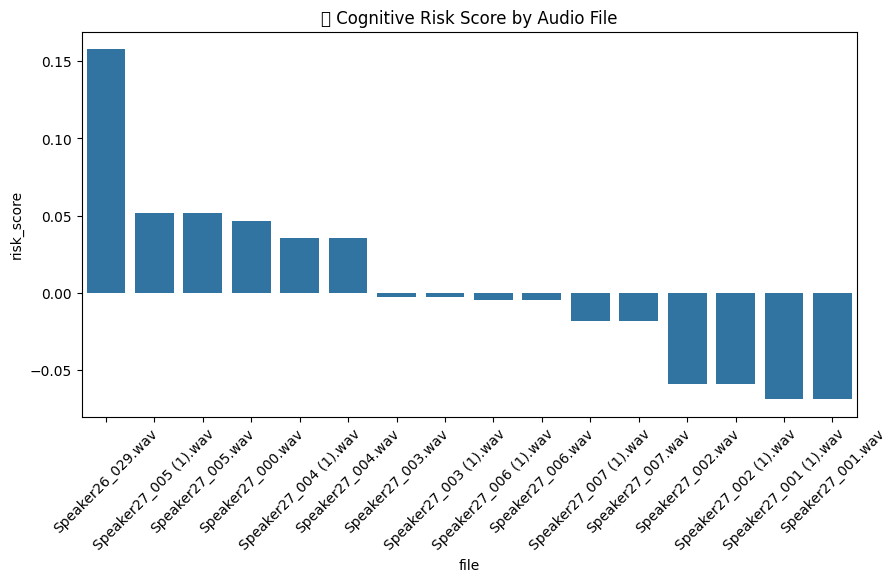

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='file', y='risk_score')
plt.xticks(rotation=45)
plt.title('🧠 Cognitive Risk Score by Audio File')
plt.show()

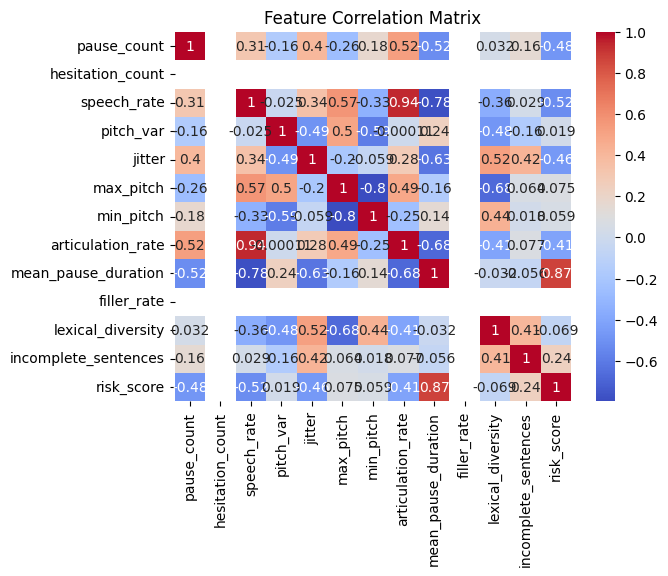

In [66]:
sns.heatmap(df.drop(columns=['file']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [67]:
def predict_cognitive_risk(file_path):
    transcript = transcribe_audio(file_path)
    features = extract_features(file_path, transcript)
    test_df = pd.DataFrame([features])
    test_df = test_df[df.drop(columns=["file", "risk_score"]).columns]
    risk_score = -ml_model.decision_function(test_df)[0]
    return risk_score, transcript

In [69]:
score, text = predict_cognitive_risk('/content/Speaker26_029.wav')
print('🧠 Risk Score:', score)
print('📝 Transcript:', text)

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


🧠 Risk Score: 0.15785987718135275
📝 Transcript:  and the lion. A fox who had never yet seen a lion when he fell in with him by a certain chance for the first time in the forest was so frightened that he was near dying from fear. On his meeting with him for the second time he was still much alarmed but not to the same extent as at first. On seeing him the third time he was so increased in boldness that he went up to him and commenced a familiar conversation with him. A acquaintance softens prejudices. The townmouse and the countrymouse. A countrymouse invited a townmouse and intimate friend to pay him a visit and portake of his country fare. As they were on the bare plowlands, eating their wheat stalks and roots pulled up from the hedgerow. The townmouse said to his friend, you live here the life of the ants.


In [70]:
df.to_csv('audio_risk_analysis.csv', index=False)